In [49]:
#Importing the requied libraries 
import numpy as np 
import pandas as pd
import re
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [50]:
#reading the data in the given CSV files
train_df = pd.read_csv('train.csv')

test_df = pd.read_csv('test.csv')                                                               
                       

In [51]:
#Printing the first five rows of the data of train csv file
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
#Printing the first five rows of the data of test csv file
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
In the Test CSV file survived data is missing because we need to predict it 

In [53]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Now we'll look into our train data and check out our useful insights from it.  


In [54]:
#printing out a list of all the columns in our training dataset
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

* Categorical : Pclass, Sex, Embarked, Survived
* Continuous : Age, Fare, Sibsp, Parch, PassengerId
* Alphanumeric: Ticket, Cabin, Name

In [55]:
#printing summary statistics of the data
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [56]:
train_df.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Hampe, Mr. Leon",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [57]:
#Finding the percantage of missing values in train dataset
train_df.isnull().sum()/ len(train_df) *100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [58]:
#Finding the percentage of Null values in test dataset
test_df.isnull().sum()/ len(test_df) *100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

#The Cabin coulmn has 77% and 78% missing values  in train and test datasets respectively hence, it should be better dropping those features

#Exploring the Sex column in our training data set and see how it affects our data

male      577
female    314
Name: Sex, dtype: int64

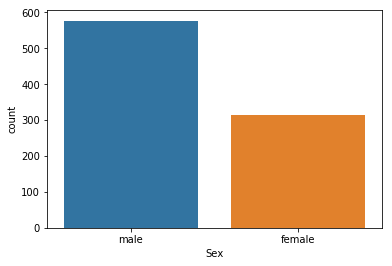

In [59]:
sns.countplot('Sex',data=train_df)
train_df['Sex'].value_counts()

NO. of male on board are more than the NO. of females Now we'll see how their survival percentages were are:

,Sex,Survived
0,female,0.742038
1,male,0.188908


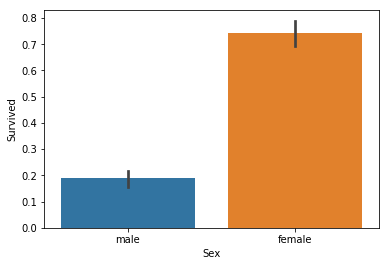

In [60]:
#Comparing the Sex feature against Survived
sns.barplot(x='Sex',y='Survived',data=train_df)
train_df.groupby('Sex',as_index=False).Survived.mean()

Form above we can conclude that no. of female survived was more than the no. of male survived.
That is 74%  females as against to 18% males

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


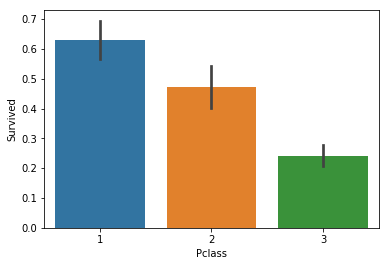

In [61]:
#Comparing the Pclass feature against Survived
sns.barplot(x='Pclass',y='Survived',data=train_df)
train_df[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

As we can see the class in which a person was, had also affected the chance fo their survival 
For Instance
For passengers in Pclass 1 chances of survival were 62.96%
For passengers in Pclass 2 chances of survival were 47.28%
For passengers in Pclass 3 chances of survival were 24.23%
Thus, belonging to Pclass 1 had a huge advantage and more chances of survival

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


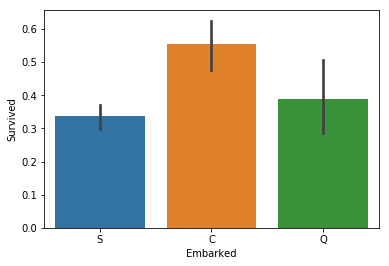

In [62]:
#Comparing the Embarked feature against Survived
sns.barplot(x='Embarked',y='Survived',data=train_df)
train_df[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

It seems that the passengers that embarked from port Cherbourg had a higher rate of Survival at 55%. 
This could be either due to their Sex or socio-economic class.
Let's move forward to see the effect of having parents or children on-board.

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


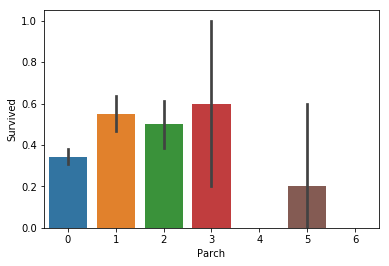

In [63]:
sns.barplot(x='Parch',y='Survived',data=train_df)
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Looks like passengers who had either 1, 2 or 3  had a higher possibility of surviving than the ones had none. However having more than 3 made the possibility even lesser.
Lets move on to the effect of having spouse or siblings on Survival:

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


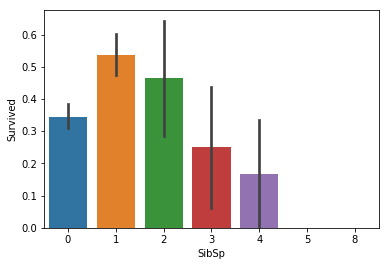

In [64]:
sns.barplot(x='SibSp',y='Survived',data=train_df)
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

It seems that having a spouse or 1 sibling had a positive effect on Survival as compared to being alone. Though the chances of survival go down with the number of siblings after 1.

The Age column has some missing values. We will take care of that later when we clean our training data.
First we shall proceed by:
1.  Plotting a histogram of the age values .
2. Taking a look at the median value of age as well as the spread.

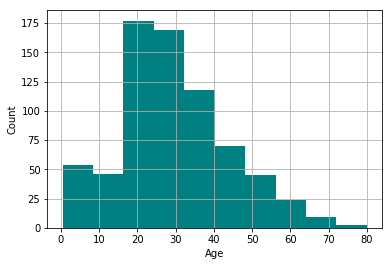

The Median age of passengers is : 28
The Standard Deviation age of passengers is : 14


In [65]:
train_df.Age.hist(bins=10,color='teal')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()
print("The Median age of passengers is :", int(train_df.Age.median()))
print("The Standard Deviation age of passengers is :", int(train_df.Age.std()))

We should check if the younger individuals had a better chance of survival or not

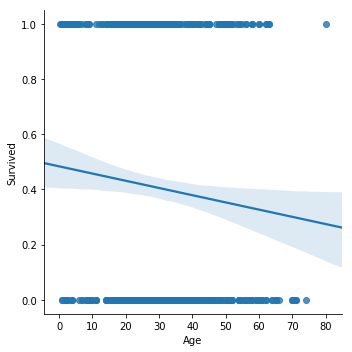

In [66]:
sns.lmplot(x='Age',y='Survived',data=train_df,palette='Set1')

Our assumption was right, younger individuals were more likely to survive.

From the sex column we saw that there was a significant difference in the percentage of men and women that survived.
Does sex also play a role when it comes to surviving the disaster along with the age?

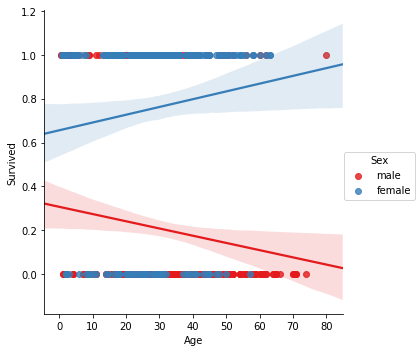

In [67]:
sns.lmplot(x='Age',y='Survived',data=train_df,hue='Sex',palette='Set1')

Age has an opposite effect on the survival in men and women. The chances of survival increase as the age of women increases.

SO: Age feature can have a different  effect on the outcome depending on the sex of the passenger. Perhaps we can use this information in feature engineering

,Sex,Age
0,female,27.0
1,male,29.0


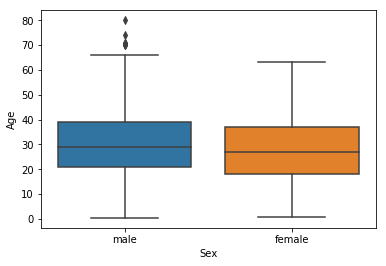

In [68]:
#Checking for outliers in Age data
sns.boxplot(x='Sex',y='Age',data=train_df)

#getting the median age according to Sex
train_df.groupby('Sex',as_index=False)['Age'].median()

Mean value of Fare is : 32.2042079685746
Median value of Fare is : 14.4542


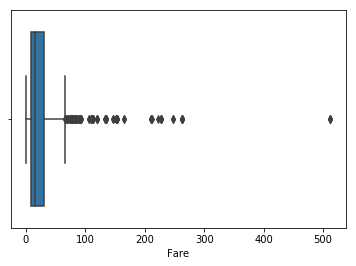

In [69]:
#plotting the Fare column to see the spread of data
sns.boxplot("Fare",data=train_df)

#Checking the mean and median values
print("Mean value of Fare is :",train_df.Fare.mean())
print("Median value of Fare is :",train_df.Fare.median())

Now that we have visualized our data , we can proceed to fill in the NaN values in our test and train datasets and drop the columns that we will not require

In [70]:
#let's start off by dropping the coulmns we will not be needing
drop_list=['Cabin','Ticket','PassengerId']

train_df = train_df.drop(drop_list,axis=1)
test_passenger_df = pd.DataFrame(test_df.PassengerId)
test_df = test_df.drop(drop_list,axis=1)

test_passenger_df.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


Now, let's fill in the missing values for Embarked column in the training dataset. Most people embarked on their journey from Southhampton port. Hence, we will be filling the  two missing values with "S"

In [71]:
#filling the missing Embarked values in train and test datasets
train_df.Embarked.fillna('S',inplace=True)

We will replace the NaN values in the age column with the median age

In [72]:
#filling the missing values in the Age column
train_df.Age.fillna(28, inplace=True)
test_df.Age.fillna(28, inplace=True)

In [73]:
#Filling the null Fare values in test dataset
test_df.Fare.fillna(test_df.Fare.median(), inplace=True)

In [74]:
#combining train and test dataframes to work with them simultaneously
Combined_data = [train_df, test_df]

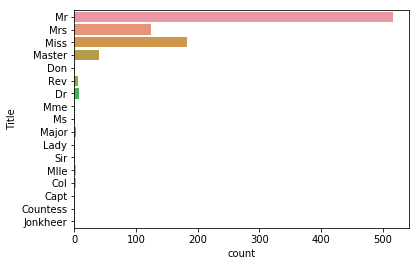

In [75]:
#extracting the various title in Names column
for dataset in Combined_data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

#Plotting the various titles extracted from the names    
sns.countplot(y='Title',data=train_df)  

In [76]:
#Refining the title feature by merging some titles
for dataset in Combined_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Special')

    dataset['Title'] = dataset['Title'].replace({'Mlle':'Miss','Ms':'Miss','Mme':'Mrs'})
    
train_df.groupby('Title',as_index=False)['Survived'].mean().sort_values(by='Survived',ascending=False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Special,0.347826
2,Mr,0.156673


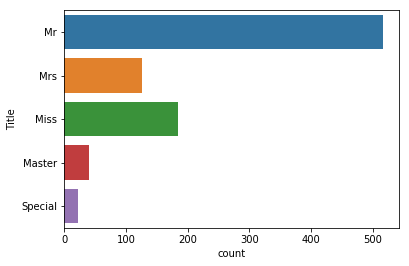

In [77]:
#Now lets see the distribution of the title feature
sns.countplot(y='Title',data=train_df)

In [78]:
#Mapping the title names to numeric values
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Special": 5}
for dataset in Combined_data:
    dataset['Title'] = dataset.Title.map(title_mapping)
    dataset['Title'] = dataset.Title.fillna(0)

Next we are creating a feature IsAlone which depends on the number of family members, that can be calculated from the Parch and SibSp columns of the train data

In [79]:
#Creating a new feature IsAlone from the SibSp and Parch columns
for dataset in Combined_data:
    dataset["Family"] = dataset['SibSp'] + dataset['Parch']
    dataset["IsAlone"] = np.where(dataset["Family"] > 0, 0,1)
    dataset.drop('Family',axis=1,inplace=True)
train_df.head()    

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,IsAlone
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1


In [80]:
#dropping the Name,SibSP and Parch columns 
for dataset in Combined_data:
    dataset.drop(['SibSp','Parch','Name'],axis=1,inplace=True)  

Age had big role to play when it came to survival. Clearly younger individuals were more likely to survive.
Hence, it should be worth considering a feature Is Minor for the passengers under the age of 15.

In [81]:
#Creating another feature if the passenger is a child
for dataset in Combined_data:
    dataset["IsMinor"] = np.where(dataset["Age"] < 15, 1, 0)

Older female passengers also had a higher chance of survival. Let's create a feature name Old_female that would account for women older tha 50 years on board

In [82]:
train_df['Old_Female'] = (train_df['Age']>50)&(train_df['Sex']=='female')
train_df['Old_Female'] = train_df['Old_Female'].astype(int)

test_df['Old_Female'] = (test_df['Age']>50)&(test_df['Sex']=='female')
test_df['Old_Female'] = test_df['Old_Female'].astype(int)

Pclass, Sex and Embarked are the categorical features in our data. we can convert these categorucal variables into dummy variables using the *get_dummies* method in python

In [83]:
#Converting categorical variables into numerical ones
train_df2 = pd.get_dummies(train_df,columns=['Pclass','Sex','Embarked'],drop_first=True)
test_df2 = pd.get_dummies(test_df,columns=['Pclass','Sex','Embarked'],drop_first=True)
train_df2.head()

,Survived,Age,Fare,Title,IsAlone,IsMinor,Old_Female,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,7.2500,1,0,0,0,0,1,1,0,1
1,1,38.0,71.2833,3,0,0,0,0,0,0,0,0
2,1,26.0,7.9250,2,1,0,0,0,1,0,0,1
3,1,35.0,53.1000,3,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,1,1,0,0,0,1,1,0,1


In [84]:
#creating Age bands in the data
train_df2['AgeBands'] = pd.qcut(train_df2.Age,4,labels=False) 
test_df2['AgeBands'] = pd.qcut(test_df2.Age,4,labels=False) 

In [85]:
#creating Fare bands in the data
train_df2['FareBand'] = pd.qcut(train_df2.Fare,7,labels=False)
test_df2['FareBand'] = pd.qcut(test_df2.Fare,7,labels=False)

In [86]:
#Dropping the Age and Fare columns
train_df2.drop(['Age','Fare'],axis=1,inplace=True)
test_df2.drop(['Age','Fare'],axis=1,inplace=True)

In [87]:
train_df2.head()
sns.barplot('AgeBands','Survived',data=train_df2)

,Survived,Title,IsAlone,IsMinor,Old_Female,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,AgeBands,FareBand
0,0,1,0,0,0,0,1,1,0,1,0,0
1,1,3,0,0,0,0,0,0,0,0,3,6
2,1,2,1,0,0,0,1,0,0,1,1,1
3,1,3,0,0,0,0,0,0,0,1,2,5
4,0,1,1,0,0,0,1,1,0,1,2,1


In [88]:
test_df2.head()

,Title,IsAlone,IsMinor,Old_Female,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,AgeBands,FareBand
0,1,1,0,0,0,1,1,1,0,2,1
1,3,0,0,0,0,1,0,0,1,3,0
2,1,1,0,0,1,0,1,1,0,3,2
3,1,1,0,0,0,1,1,0,1,1,2
4,3,0,0,0,0,1,0,0,1,0,2


Now we try out different classifying model to see which fits the best.

In [89]:
#importing the required ML libraries in our program
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score

In [90]:
#Splitting out training data into X: features and y: target
X = train_df2.drop("Survived",axis=1) 
y = train_df2["Survived"]

#splitting our training data again in train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [91]:
#Now we are using theLogisticRegression method
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
acc_logreg = round(accuracy_score(y_pred, y_test) * 100, 2)
acc_logreg

79.849999999999994

In [92]:
#validation for logistic Regression
cv_scores = cross_val_score(logreg,X,y,cv=5)
 
np.mean(cv_scores)*100

80.02172149882243

In [93]:
#Now we are using theDecisionTreeClassifier  method
decisiontree = DecisionTreeClassifier()
dep = np.arange(1,10)
param_grid = {'max_depth' : dep}

clf_cv = GridSearchCV(decisiontree, param_grid=param_grid, cv=5)

clf_cv.fit(X, y)
clf_cv.best_params_,clf_cv.best_score_*100
print('Best value of max_depth:',clf_cv.best_params_)
print('Best score:',clf_cv.best_score_*100)

Best value of max_depth: {'max_depth': 4}
Best score: 82.379349046


In [94]:
#Now we are using the RandomForestCLassifier method

random_forest = RandomForestClassifier()
ne = np.arange(1,20)
param_grid = {'n_estimators' : ne}

rf_cv = GridSearchCV(random_forest, param_grid=param_grid, cv=5)

rf_cv.fit(X, y)
print('Best value of n_estimators:',rf_cv.best_params_)
print('Best score:',rf_cv.best_score_*100)

Best value of n_estimators: {'n_estimators': 15}
Best score: 79.1245791246


We have achieved the best accuracy by the DECISION TREE CLASSIFIER i.e 82.37%